### mecab 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-10-30 07:28:47--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-10-30 07:28:47--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc35f24656075d7ecb0d2fce768.dl.dropboxusercontent.com/cd/0/get/BvwYsb8VedxZyEtMXAtbdElk4j7BLSxadOzrHNsPWqu272XNLrgsFiRsQgAs-BlzCwnJSLxKbYYG9Nyvsl-prv0fZKCouS6Mj92ZiLAq6OlsVehG95nxly0vkdngAGGU0UcYsyIJ_nndv69tuNPkvh0KGUdb5cwZa4xFh9Mk9tSwM756lZ_rSfCsamPcDgGZB-0/file?dl=1# [following]
--2022-10-30 07:28:48--  https://ucc35f24656075d7ecb0d2fce768.dl.dropboxusercontent.com/cd/0/get/BvwYsb8Ve

In [3]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab.morphs('안녕하세용')

['안녕', '하세용']

In [ ]:
#tokenizer.word_counts

In [ ]:
"""
tokenizer1 = Tokenizer()
tokenizer2 = Tokenizer()
tokenizer3 = Tokenizer()
tokenizer1.fit_on_texts(voice_noun_join)
tokenizer2.fit_on_texts(impersonation_noun_join)
tokenizer3.fit_on_texts(fraud_noun_join)
voice_count_desc = sorted(tokenizer1.word_counts, key = lambda x : x[1], reverse = True)
impersonation_count_desc = sorted(tokenizer2.word_counts, key = lambda x : x[1], reverse = True)
fraud_count_desc = sorted(tokenizer3.word_counts, key = lambda x : x[1], reverse = True)
"""

'\ntokenizer1 = Tokenizer()\ntokenizer2 = Tokenizer()\ntokenizer3 = Tokenizer()\ntokenizer1.fit_on_texts(voice_noun_join)\ntokenizer2.fit_on_texts(impersonation_noun_join)\ntokenizer3.fit_on_texts(fraud_noun_join)\nvoice_count_desc = sorted(tokenizer1.word_counts, key = lambda x : x[1], reverse = True)\nimpersonation_count_desc = sorted(tokenizer2.word_counts, key = lambda x : x[1], reverse = True)\nfraud_count_desc = sorted(tokenizer3.word_counts, key = lambda x : x[1], reverse = True)\n'

### 모델링시작

In [8]:
keywords = list(set(['대포통장', '명의도용', '개인정보유출', '금융범죄', '수사관', '동결', '서울중앙지검', '신용카드', '피해자', '녹취',
            '방해죄', '해킹', '재판부', '고소', '재판', '수수료', '사기', '검찰', '체포영장', '신분증개설', '도난', '검찰청', '집행', '압수수색',
            '변호사', '피의자', '거래법', '개설', '보안', '영업', '경찰청', '검찰', 
            '수수료', '신용', '신용도', '입금']))

In [9]:
#from gensim.models import FastText
#result = voice_noun + impersonation_noun + fraud_noun
#model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [10]:
#model.most_similar('대포통장')

In [11]:
import random
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/all_df_with_tokens_according_to_topic.csv')
df.head()

,Unnamed: 0,sentence,tokens,cityCode,convrsThema,gender,age
0,0,밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서 감사하게 감사하게 생각하...,밥 끼 제대로 밥 끼 수 생각 생각 노후 제 가장 연예인 별 온 그대 전지현 잔디 ...,경상,방송/연예,여,60
1,1,그거 먹고 살아야 되는 거지 자식 물려줄 필요없고요 그걸로 모자라는 부분은 다른 곳...,그거 거지 자식 걸 부분 다른 곳 충당 백세 시대 요즘 자식 부모 자기 자기 자식 ...,경상,경제/재태크,여,60
2,2,결국 주차 요금을 올릴 수밖에 없어요 결국 최씨는 수리를 삼십일로 미뤄야 했습니다 ...,주차 요금 수 최씨 수리 삼십일 최종 결론 연말 퇴진 시점 알 수가 필자 인상 편이...,경상,PBS,여,60
3,3,저 사람이 나한테 저렇게 행동을 하는구나 저 사람이 원하는 게 무엇인가를 내가 생각...,저 사람 나 행동 저 사람 게 무엇 를 내 생각 사람 일이 생각 극 달 화가 내 좀...,기타,휴일,여,60
4,4,이 사람의 입장은 이럴 수 있구나 라고 배울 수 있는거지 그런건 정말 중요하고 꼭 ...,이 사람 입장 수 수 정말 꼭 것 친구 옛날 사람 손 맛 우리 쪽 다슬기 거 전혀 ...,기타,먹거리,여,60


In [43]:
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/그놈목소리.txt', 'r', encoding='UTF8') as f :
  voice = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/수사기관사칭.txt', 'r', encoding='UTF8') as f :
  impersonation = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/은행사기.txt', 'r', encoding='UTF8') as f :
  fraud = f.readlines()

voice = [v[:-1] for v in voice]
impersonation = [m[:-1] for m in impersonation]
fraud = [f[:-1] for f in fraud]

print('보이스피싱 총 데이터수 : ', len(voice)+len(impersonation)+len(fraud))
voice_phishing_txt = random.sample(voice+impersonation+fraud, 188)
normal_txt = random.sample(list(df['sentence']), 188)
print(voice_phishing_txt[0])
print(normal_txt[0])

보이스피싱 총 데이터수 :  288
3시경 편집이라는게 어떤 방법으로 당일 날 바로 상인 시키는 거 불가합니다 방법으로는 불가능하거든요 그렇기 때문에 저희 쪽에서는 방법을 통해서 도와 드릴 거거든요 하셔야 되고요 예 근데 고객님 하루만에 되지 않습니다 그래서 방법이 필요한 거고 방법으로 가장 확실한 방법이 있습니다 정상적인 사용 방법은 어떻게 되냐면 문제 해결해 달라고 2단계 사원이라는 망치고 통해서 이잖아 중도상환수수료 또는 고객님 신용상의 불이익을 안 받고 할 수 있는 방법이거든요 전기 사고 처리 하실 때 이제 전산상으로 그 고객님 오늘 빌려서 오늘 갚으시는 거지만 전산 상으로는 평점이 올라갈 수 있대 대출 이용 계약 기간 3년 전보다 이용을 하고 처리하신 것처럼 서류를 작성해서 등록을 해 드릴 겁니다 그러면 오늘 아가씨거든요
나는 이번 휴가를 팔월 (NO:이십 삼일부터) 가거든 (NO:) 근데 자네는 언제 갈 거야
 나는 아이 유치원 방학 때 잠깐 어디 갔다 오려고  (SP:하는) 하고 있거든
 교회에서 일월에 이스라엘에 가기로 했는데 (NO:)  일 때문에 못 갈 것 같고
 우리 교회에서는 권사님들을 포함해서 (SN:) 많이 가려고 추진하고 (NO:있는데)
 (SP:이스라엘례) 까지 가는 일정이 구박 십일인데 비울 수가 없어
 이참에 같이 가자고 난리인데  (SN:) 시월까지 확답을 달라고 (NO:하더라고)
 (NO:태국) 치앙마이에 오박 육일로 갔다 왔는데 괜찮다고 하더라고
 그 흔한 중국을 나는 못 가 봤어 (SN:) 계속 갈 기회가 있었는데
 지금은 많이 제한됐는데  어쨌든 (SN:) 말레이시아 물가가 너무 싸고
 


In [44]:
voice_phishing_txt_token = [mecab.nouns(w) for w in voice_phishing_txt]
normal_txt_token = [mecab.nouns(w) for w in normal_txt]
print(voice_phishing_txt_token[:2])
print(normal_txt_token[:2])

[['시', '편집', '게', '방법', '당일', '날', '상인', '거', '불가', '방법', '가능', '때문', '저희', '쪽', '방법', '거', '고객', '하루', '만', '방법', '필요', '거', '방법', '방법', '정상', '사용', '방법', '문제', '해결', '단계', '사원', '이', '중도', '상환', '수수료', '고객', '신용', '이익', '수', '방법', '전기', '사고', '처리', '때', '산상', '고객', '거', '전산', '상', '평점', '수', '대출', '이용', '계약', '기간', '년', '전', '이용', '처리', '것', '서류', '작성', '등록', '겁니다', '아가씨'], ['연락', '통화', '가능', '연락', '건', '개인', '정보', '유출', '때문', '불', '사이', '신분증', '면허증', '분실', '적', '은행', '크루즈', '개인', '정보', '유출', '그거', '시', '사례', '저녁', '식사', '이거', '이유', '저희', '년', '월', '일', '불법', '도박', '금융', '사', '기단', '일정', '현장', '부산은행', '통장', '농장', '만', '원', '상담', '분', '부산은행', '년', '남성', '사람', '감상', '통장', '돈', '시술', '데', '본인', '방송', '말씀', '돈', '금융', '거래', '실명', '법', '원칙', '통장', '개설', '본인', '신분증', '지참', '해당', '은행', '통장', '발급', '본인', '문화재', '거', '본인', '입장', '이해', '황금', '수', '이번', '사건', '방송', '사람', '불법', '도박', '사이트', '운영', '통장', '필요', '원인', '포함', '전국', '아들', '통장', '구매', '진출', '연락', '부분', '부산', '고등', '검찰청', '김나영', '수사관', '

In [ ]:
#model.most_similar('저번')
#OOV 문제 발생. pretrained로 해야할듯

In [15]:
!pip install --upgrade gensim==3.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 18.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [16]:
from gensim import models

ko_model = models.fasttext.load_facebook_model('/content/drive/MyDrive/Colab Notebooks/FastText_pretrained/cc.ko.300.bin')

ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa1\x9c'; replacing invalid characters, using '\\xed\\xa1\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb0\x80'; replacing invalid characters, using '\\xed\\xb0\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa7\x80'; replacing invalid characters, using '\\xed\\xa7\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb8\xb0'; replacing invalid characters, using '\\xed\\xb8\\xb0'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa0\x9c'; replacing invalid characters, using '\\xed\\xa0\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa6\xac'; replacing invalid characters, using '\\xed\\xa6\\xac'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb3\xb5'; replacing invalid characters, using '\\xed\\xb

In [36]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

#### vanila하게 결과보기

In [ ]:
def detection_vanila(target, keywords, model, window_size=5) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    target_sim.append(tmp_sum)
  return target_sim, sum(target_sim) / len(target_sim)


In [ ]:
mean_voice_phishing = []
mean_normal = []

for i in range(len(normal_txt_token)) :
  mean_normal.append(detection_vanila(normal_txt_token[i], keywords, ko_model)[1])

for i in range(len(voice_phishing_txt_token)) :
  mean_voice_phishing.append(detection_vanila(voice_phishing_txt_token[i], keywords, ko_model)[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in float_scalars
  """


In [ ]:
print(mean_normal)
print(mean_voice_phishing)

[3.997686469984496, 4.285552737961755, 3.772477957858549, 3.4330568589422104, 3.8806444467869974, 3.9857384661180815, 3.9143920972943307, 3.8670667694536056, 4.330788102311392, 3.857740893252678]
[5.219109069699438, 5.071173944414278, 4.694254377148388, 5.559870718441541, 5.914664463552001, 4.742429119571293, 4.470349463251578, 4.90362695978461, nan, 4.901668278930513]


#### window 설정해서 보기 (상위 2개)

In [37]:
def detection_window(target, keywords, model, window_size=10) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum)
  
  result = []
  for i in range(len(target_sim) - window_size + 1) :
    w_sim = target_sim[i:i+window_size]
    w_desc = sorted(w_sim, reverse=True)
    w_top2 = w_desc[:2]
    result.append(sum(w_top2)/2)
  return result

In [ ]:
window_voice_phishing = []
window_normal = []

for i in range(len(normal_txt_token)) :
  window_normal.append(detection_window(normal_txt_token[i], keywords, ko_model))

for i in range(len(voice_phishing_txt_token)) :
  window_voice_phishing.append(detection_window(voice_phishing_txt_token[i], keywords, ko_model))

In [71]:
print(window_voice_phishing)
print(window_normal)

[[7.057825267314911, 7.057825267314911, 7.057825267314911, 6.257145468145609, 5.903863662853837], [7.056879425421357, 7.056879425421357, 7.056879425421357, 7.056879425421357, 7.056879425421357, 7.056879425421357, 6.763148876838386, 7.056879425421357, 7.056879425421357, 6.503913221880794, 7.107157494407147, 7.107157494407147, 7.107157494407147, 7.107157494407147, 7.107157494407147, 7.107157494407147, 7.107157494407147, 7.024491937365383, 7.024491937365383, 7.024491937365383, 6.395664369687438, 6.395664369687438, 6.677162861451507, 6.677162861451507, 6.677162861451507, 6.677162861451507, 6.170730948448181, 5.936351340729743, 5.936351340729743, 5.936351340729743, 5.936351340729743, 5.936351340729743], [8.865573066286743, 8.865573066286743, 8.567064633360133, 8.567064633360133, 8.567064633360133, 8.567064633360133, 7.243250212399289, 7.243250212399289, 7.243250212399289, 7.243250212399289, 7.243250212399289, 7.243250212399289, 7.243250212399289, 7.243250212399289, 7.243250212399289, 7.2432

#### plot 그리기

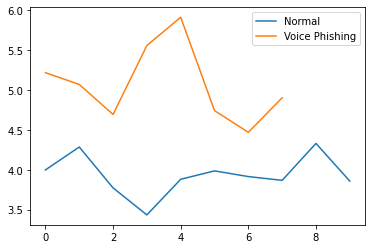

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mean_normal)
plt.plot(mean_voice_phishing)
plt.legend(['Normal', 'Voice Phishing'])

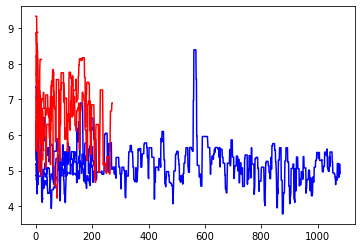

In [41]:
import matplotlib.pyplot as plt

plt.plot(window_normal[0], 'b-')

plt.plot(window_normal[1], 'b-')
plt.plot(window_normal[2], 'b-')
plt.plot(window_normal[3], 'b-')
plt.plot(window_normal[4], 'b-')
plt.plot(window_normal[5], 'b-')
plt.plot(window_normal[6], 'b-')
plt.plot(window_normal[7], 'b-')
plt.plot(window_normal[8], 'b-')
plt.plot(window_normal[9], 'b-')


plt.plot(window_voice_phishing[0], 'r-')

plt.plot(window_voice_phishing[1], 'r-')
plt.plot(window_voice_phishing[2], 'r-')
plt.plot(window_voice_phishing[3], 'r-')
plt.plot(window_voice_phishing[4], 'r-')
plt.plot(window_voice_phishing[5], 'r-')
plt.plot(window_voice_phishing[6], 'r-')
plt.plot(window_voice_phishing[7], 'r-')
plt.plot(window_voice_phishing[8], 'r-')
plt.plot(window_voice_phishing[9], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

#### acc보기

In [69]:
#주기적인 초기화가 필요한가??
def acc(voice_phishing_txt, normal_txt, voice_phishing_txt_token, normal_txt_token, windows, threshold, count) :
  res = []
  for w in windows :
    window_voice_phishing = []
    window_normal = []
    
    for i in range(len(voice_phishing_txt_token)) :
      window_voice_phishing.append(detection_window(voice_phishing_txt_token[i], keywords, ko_model, w))
    
    for i in range(len(normal_txt_token)) :
      window_normal.append(detection_window(normal_txt_token[i], keywords, ko_model, w))
    
    for t in threshold :
      for c in count :
        TN = 0
        TP = 0
        FN = 0
        FP = 0
        TN_lst = []
        TP_lst = []
        FN_lst = []
        FP_lst = []
        for i in range(len(window_voice_phishing)) :
          cnt = 0
          for j in range(len(window_voice_phishing[i])) :
            if window_voice_phishing[i][j] >= t :
              cnt += 1
          if cnt >= c :
            TP_lst.append(voice_phishing_txt[i])
            TP += 1
          else :
            FP += 1
            FP_lst.append(voice_phishing_txt[i])
        
        for i in range(len(window_normal)) :
          cnt = 0
          for j in range(len(window_normal[i])) :
            if window_normal[i][j] >= t :
              cnt += 1
          if cnt >= c :
            FN_lst.append(normal_txt[i])
            FN += 1
          else :
            TN += 1
            TN_lst.append(normal_txt[i])
        
        print(f'--Window size : {w}, Threshold : {t}, Count : {c}--')
        print('TP : ', TP)
        print('TN : ', TN)
        print('FP : ', FP)
        print('FN : ', FN)

        res.append(f'--Window size : {w}, Threshold : {t}, Count : {c}--' + '\n')
        res.append(f'TP : {TP}\n')
        res.append(f'TN : {TN}\n')
        res.append(f'FP : {FP}\n')
        res.append(f'FN : {FN}\n')

        if TP >= 10 :
          print('TP_lst : ', random.sample(TP_lst, 10))
          res.append(f'TP_lst : {str(random.sample(TP_lst, 10))}\n')
        else :
          print('TP_lst : ', TP_lst)
          res.append(f'TP_lst : {str(TP_lst)}\n')
        
        if TN >= 10 :
          print('TN_lst : ', random.sample(TN_lst, 10))
          res.append(f'TN_lst : {str(random.sample(TN_lst, 10))}\n')
        else :
          print('TN_lst : ', TN_lst)
          res.append(f'TN_lst : {str(TN_lst)}\n')

        if FP >= 10 :
          print('FP_lst : ', random.sample(FP_lst, 10))
          res.append(f'FP_lst : {str(random.sample(FP_lst, 10))}\n')
        else :
          print('FP_lst : ', FP_lst)
          res.append(f'FP_lst : {str(FP_lst)}\n')

        if FN >= 10 :
          print('FN_lst : ', random.sample(FN_lst, 10))
          res.append(f'FN_lst : {str(random.sample(FN_lst, 10))}\n')
        else :
          print('FN_lst : ', FN_lst)
          res.append(f'FN_lst : {str(FN_lst)}\n')

        print(f'Acc = {(TP+TN)/(TP+TN+FP+FN)}')
        print(f'Recall = {(TP)/(TP+FN)}')
        print(f'Precision = {(TP)/(TP+FP)}')
        print('\n')
        res.append(f'Acc = {(TP+TN)/(TP+TN+FP+FN)}\n')
        res.append(f'Recall = {(TP)/(TP+FN)}\n')
        res.append(f'Precision = {(TP)/(TP+FP)}\n')
        res.append('\n')
  with open("Voice_Phishing_detection according windwos, thresholds, count.txt", 'w', encoding='UTF8') as f :
    f.writelines(res)    
    
    

In [70]:
windows = [5, 7, 9]
threshold = [5, 6, 7, 8]
count = [2, 3, 4, 5]
acc(voice_phishing_txt, normal_txt, voice_phishing_txt_token, normal_txt_token, windows, threshold, count)

Output hidden; open in https://colab.research.google.com to view.

#### acc보기 (주기적으로 count 초기화)

In [78]:
#주기적인 초기화가 필요한가??
def acc_init_by_window(voice_phishing_txt, normal_txt, voice_phishing_txt_token, normal_txt_token, windows, threshold, count, initialize_w) :
  res = []
  for w in windows :
    window_voice_phishing = []
    window_normal = []
    
    for i in range(len(voice_phishing_txt_token)) :
      window_voice_phishing.append(detection_window(voice_phishing_txt_token[i], keywords, ko_model, w))
    
    for i in range(len(normal_txt_token)) :
      window_normal.append(detection_window(normal_txt_token[i], keywords, ko_model, w))
    
    for t in threshold :
      for c in count :
        for init in initialize_w :
          TN = 0
          TP = 0
          FN = 0
          FP = 0
          TN_lst = []
          TP_lst = []
          FN_lst = []
          FP_lst = []
          
          for i in range(len(window_voice_phishing)) :
            cnt = 0
            for j in range(len(window_voice_phishing[i])) :
              if j % init == 0 :
                cnt=0
              if window_voice_phishing[i][j] >= t :
                cnt += 1
            if cnt >= c :
              TP_lst.append(voice_phishing_txt[i])
              TP += 1
            else :
              FP += 1
              FP_lst.append(voice_phishing_txt[i])
          
          for i in range(len(window_normal)) :
            cnt = 0
            for j in range(len(window_normal[i])) :
              if j % init == 0 :
                cnt=0
              if window_normal[i][j] >= t :
                cnt += 1
            if cnt >= c :
              FN_lst.append(normal_txt[i])
              FN += 1
            else :
              TN += 1
              TN_lst.append(normal_txt[i])
          
          print(f'--Window size : {w}, Threshold : {t}, Count : {c}--, Init_by_window : {init}')
          print('TP : ', TP)
          print('TN : ', TN)
          print('FP : ', FP)
          print('FN : ', FN)

          res.append(f'--Window size : {w}, Threshold : {t}, Count : {c}--, Init_by_window : {init}' + '\n')
          res.append(f'TP : {TP}\n')
          res.append(f'TN : {TN}\n')
          res.append(f'FP : {FP}\n')
          res.append(f'FN : {FN}\n')

          if TP >= 10 :
            print('TP_lst : ', random.sample(TP_lst, 10))
            res.append(f'TP_lst : {str(random.sample(TP_lst, 10))}\n')
          else :
            print('TP_lst : ', TP_lst)
            res.append(f'TP_lst : {str(TP_lst)}\n')
          
          if TN >= 10 :
            print('TN_lst : ', random.sample(TN_lst, 10))
            res.append(f'TN_lst : {str(random.sample(TN_lst, 10))}\n')
          else :
            print('TN_lst : ', TN_lst)
            res.append(f'TN_lst : {str(TN_lst)}\n')

          if FP >= 10 :
            print('FP_lst : ', random.sample(FP_lst, 10))
            res.append(f'FP_lst : {str(random.sample(FP_lst, 10))}\n')
          else :
            print('FP_lst : ', FP_lst)
            res.append(f'FP_lst : {str(FP_lst)}\n')

          if FN >= 10 :
            print('FN_lst : ', random.sample(FN_lst, 10))
            res.append(f'FN_lst : {str(random.sample(FN_lst, 10))}\n')
          else :
            print('FN_lst : ', FN_lst)
            res.append(f'FN_lst : {str(FN_lst)}\n')

          print(f'Acc = {(TP+TN)/(TP+TN+FP+FN)}')
          print(f'Recall = {(TP)/(TP+FN)}')
          print(f'Precision = {(TP)/(TP+FP)}')
          print('\n')
          res.append(f'Acc = {(TP+TN)/(TP+TN+FP+FN)}\n')
          res.append(f'Recall = {(TP)/(TP+FN)}\n')
          res.append(f'Precision = {(TP)/(TP+FP)}\n')
          res.append('\n')
  with open("Voice_Phishing_detection according windwos, thresholds, count, init.txt", 'w', encoding='UTF8') as f :
    f.writelines(res)    
    
    

In [79]:
windows = [5, 7, 9]
threshold = [5, 6, 7, 8]
count = [2, 3, 4, 5]
initialize_count_by_window = [6, 8, 10, 12, 14, 16, 18, 20, 10**10] # 10**10 -> no initialize
acc_init_by_window(voice_phishing_txt, normal_txt, voice_phishing_txt_token, normal_txt_token, windows, threshold, count, initialize_count_by_window)

Output hidden; open in https://colab.research.google.com to view.